In [1]:
#!pip install scipy
import tensorflow as tf
import matplotlib.image as img
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
#from tensorflow.keras.preprocessing import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
#Image flow from directory, data image gen
#from skimage import io, color, filters
#from skimage.transform import resize, rotate
print(tf.__version__)
print(tf.test.gpu_device_name())
#!pip install tensorflow_datasets


2.3.1
/device:GPU:0


In [4]:
os.listdir('../data/meta/')

['meta']

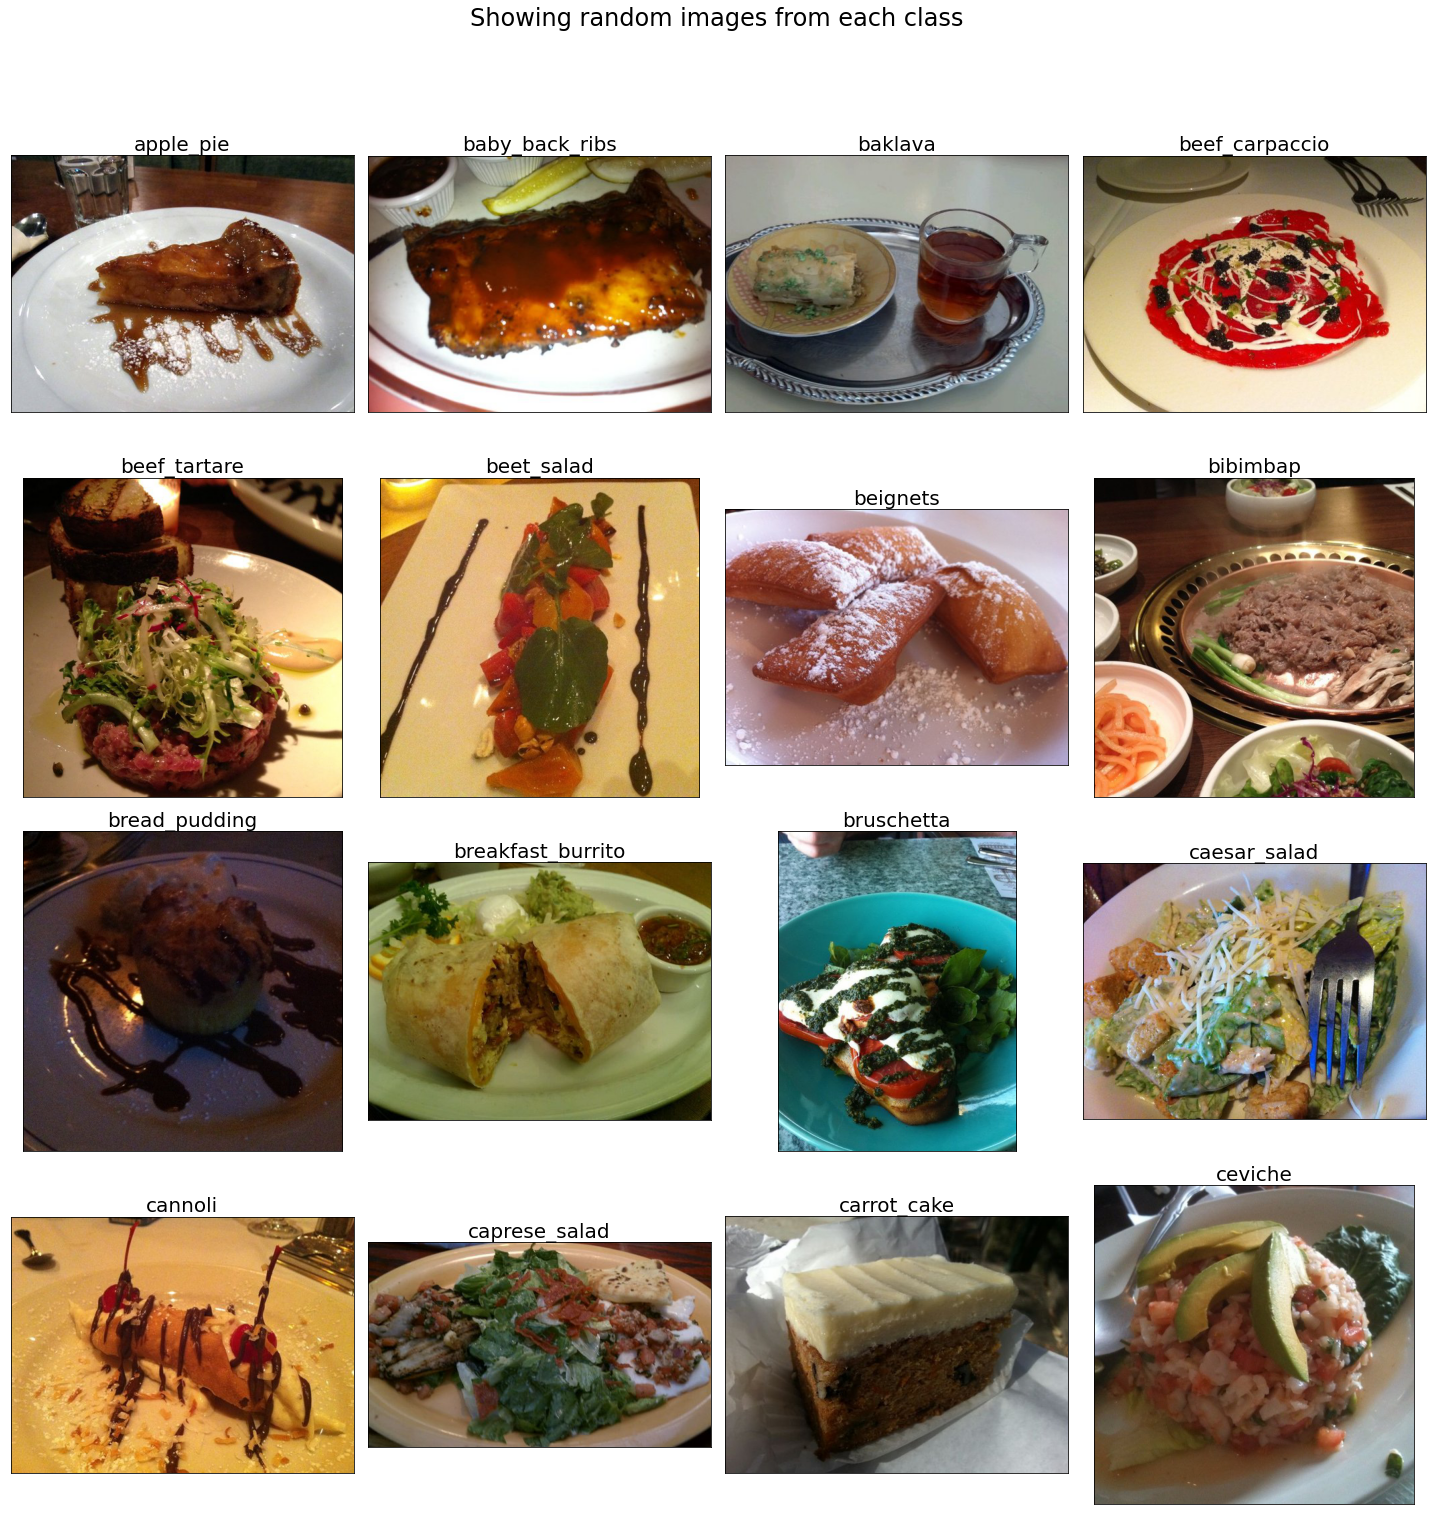

In [13]:
def show_all_images(ax,title,row,col):
    fig, ax = plt.subplots(row,col, figsize=(20,20))
    fig.suptitle(title,fontsize=24, y=1.05)
    data_loc = '../data/images/'
    accum = 0
    sorted_pics = sorted(os.listdir(data_loc))
    for i in range(row):
        for j in range(col):
            food_selected = sorted_pics
            food = food_selected[accum]
            accum +=1 

            # returns the list of all files 
            food_images = os.listdir(os.path.join(data_loc,food)) # joins the dir to food selected
            food_images_random = np.random.choice(food_images) # then choses a random image inside of it 
            img = plt.imread(os.path.join(data_loc,food,food_images_random)) # joins the dir to the random image selected
            # img returns matrix acutally 
            ax[i][j].imshow(img)
            ax[i][j].set_title(food, fontsize=20,pad=5)
    plt.setp(ax, xticks=[],yticks=[])
    plt.tight_layout()



show_all_images(10,'Showing random images from each class', 4,4)



# holdout set

In [88]:
sorted_pics = sorted(os.listdir(data_loc))
sorted_pics[1:].to_numpy()

AttributeError: 'list' object has no attribute 'to_numpy'

## Grayscaling 



Converting to grayscale allows us to do more things:

Simplify the classification to shape and lighting only
Maintain some semblance of sampling density (RGB features at 33px = 3267)


In [ ]:
def grayscale(file_location, count):

def show_all_images(ax,title,row,col, filter_):
    fig, ax = plt.subplots(row,col, figsize=(20,20))
    fig.suptitle(title,fontsize=24, y=1.05)
    data_loc = '../data/images/'
    accum = 0
    sorted_pics = sorted(os.listdir(data_loc))
    for i in range(row):
        for j in range(col):
            food_selected = sorted_pics
            food = food_selected[accum]
            accum +=1 

            # returns the list of all files 
            food_images = os.listdir(os.path.join(data_loc,food)) # joins the dir to food selected
            food_images_random = np.random.choice(food_images) # then choses a random image inside of it 
            img = plt.imread(os.path.join(data_loc,food,food_images_random)) # joins the dir to the random image selected
            # img returns matrix acutally 
            ax[i][j].imshow(img)
            ax[i][j].set_title(food, fontsize=20,pad=5)
    plt.setp(ax, xticks=[],yticks=[])
    plt.tight_layout()



show_all_images(10,'Showing random images from each class', 4,4,filter_)

In [11]:

def test_split(rootdir):
    root_dir = rootdir
    """
    # train dirs
    for food in os.listdir(os.path.join(root_dir,'images')):
        os.makedirs(root_dir +'/train/' + food)
    # test dirs
    for food in os.listdir(os.path.join(root_dir,"images")):
        os.makedirs(root_dir + "/test/" + food)
    # var dirs
    for food in os.listdir(os.path.join(root_dir,"images")):
        os.makedirs(root_dir + "/var/" + food)
    """
    food_names = os.listdir(os.path.join(root_dir,'images'))
    for food in food_names:
        currentCls = food
        src = os.path.join(root_dir,'images',currentCls) # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])

        train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
        val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
        
        print('Total images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
    
        for name in train_FileNames:
            shutil.copy(name, root_dir+"/train/"+currentCls)

        for name in val_FileNames:
            shutil.copy(name, root_dir+"/var/"+currentCls)

        for name in test_FileNames:
            shutil.copy(name, root_dir+"/test/"+currentCls)
            
            

print(test_split('../data'))
    
    

Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images

In [14]:
os.read_txt('../data/meta/meta/classes.txt')

AttributeError: module 'os' has no attribute 'read_txt'

In [2]:
labels_all= '''apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheesecake
cheese_plate
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravioli
red_velvet_cake
risotto
samosa
sashimi
scallops
seaweed_salad
shrimp_and_grits
spaghetti_bolognese
spaghetti_carbonara
spring_rolls
steak
strawberry_shortcake
sushi
tacos
takoyaki
tiramisu
tuna_tartare
waffles'''
user_words = labels_all
word_list = user_words.split()
user_words = []
for word in word_list:
    user_words.append(word)
user_words = " ".join(user_words)
class_labels = user_words.split()

In [19]:
# 
X = image_dataset_from_directory(
    '../data/train/',
    labels="inferred",
    label_mode="categorical",
    class_names=class_labels,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)


Found 70700 files belonging to 101 classes.


In [2]:
# making only 5 classes
X5_train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
X5_test_datagen = ImageDataGenerator(rescale=1./255)
X5_var_datagen = ImageDataGenerator(rescale=1./255)

labels_5 = ['apple_pie','waffles','gnocchi','chocolate_mousse','baklava']

X5_train = X5_train_datagen.flow_from_directory(
    '../data/train_mini/',
    target_size=(384,384),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

X5_test = X5_test_datagen.flow_from_directory(
    '../data/test_mini/',
    target_size=(384,384),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)
X5_var = X5_var_datagen.flow_from_directory(
    '../data/var_mini/',
    target_size=(384,384),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)


# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#         'data/train',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')
# validation_generator = test_datagen.flow_from_directory(
#         'data/validation',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')
# model.fit(
#         train_generator,
#         steps_per_epoch=2000,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=800)


Found 3500 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
Found 750 images belonging to 5 classes.


In [4]:
class_names = X5_train.class_names
print(class_names)


AttributeError: 'DirectoryIterator' object has no attribute 'class_names'

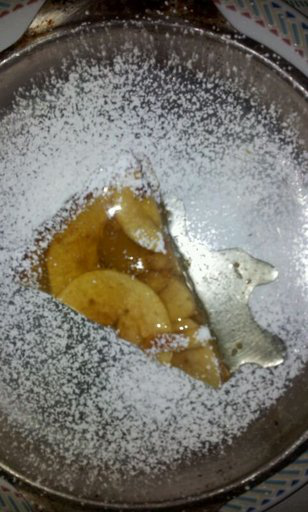

In [59]:

tf.keras.preprocessing.image.load_img(
    '../data/train/apple_pie/1005649.jpg', grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"
)


In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in X5_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(labels)
    plt.axis("off")


AttributeError: 'DirectoryIterator' object has no attribute 'take'

<Figure size 720x720 with 0 Axes>

Tensorflow cnn


In [3]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [5]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True, monitor = 'val_loss') 
checkpoint_filepath = './CNN/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [7]:

# def define_model(nb_filters, kernel_size, input_shape, pool_size,nb_classes=5):
#     model = Sequential() # model is a linear stack of layers (don't change)

#     # note: the convolutional layers and dense layers require an activation function
#     # see https://keras.io/activations/
#     # and https://en.wikipedia.org/wiki/Activation_function
#     # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

#     model.add(Conv2D(nb_filters, (kernel_size[0], kernel_size[1]),
#                         padding='valid', 
#                         input_shape=input_shape)) #first conv. layer  KEEP
#     model.add(Activation('relu')) # Activation specification necessary for Conv2D and Dense layers

#     model.add(Conv2D(nb_filters*2, (kernel_size[0], kernel_size[1]), padding='valid')) #2nd conv. layer KEEP
#     model.add(Activation('relu'))

#     model.add(MaxPooling2D(pool_size=pool_size)) # decreases size, helps prevent overfitting
#     model.add(Dropout(0.5)) # zeros out some fraction of inputs, helps prevent overfitting

#     model.add(Flatten()) # necessary to flatten before going into conventional dense layer  KEEP
#     print('Model flattened out to ', model.output_shape)

#     # now start a typical neural network
#     model.add(Dense(32)) # (only) 32 neurons in this layer, really?   KEEP
#     model.add(Activation('relu'))

#     model.add(Dropout(0.5)) # zeros out some fraction of inputs, helps prevent overfitting

#     model.add(Dense(nb_classes)) # 10 final nodes (one for each class)  KEEP
#     model.add(Activation('softmax')) # softmax at end to pick between classes 0-9 KEEP

#     # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
#     # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
#     # and KEEP metrics at 'accuracy'
#     # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
#     model.compile(loss='categorical_crossentropy',
#                 optimizer='adam',
#                 metrics=['accuracy'])
#     return model

# # important inputs to the model: don't changes the ones marked KEEP 
# batch_size = 32  # number of training samples used at a time to update the weights
# nb_classes = 5   # number of output possibilites: [0 - 9] KEEP
# nb_epoch = 2     # number of passes through the entire train dataset before weights "final"
# img_rows, img_cols = 256, 256  # the size of the MNIST images KEEP
# input_shape = [img_rows, img_cols, 1]  # 1 channel image input (grayscale) 3 color
# nb_filters = 32  # number of convolutional filters to use
# pool_size = 4 # pooling decreases image size, reduces computation, adds translational invariance
# kernel_size = (3, 3) # convolutional kernel size, slides over image to learn features



# model = define_model(nb_filters, kernel_size, input_shape, pool_size, nb_classes=5)

# # during fit process watch train and test error simultaneously
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model0.h5", save_best_only=True)
# tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# model.fit(X5_train, batch_size=batch_size, epochs=nb_epoch,steps_per_epoch=110,validation_data=X5_var,validation_steps=22, callbacks=[checkpoint_cb,tensorboard_cb])


# score = model.evaluate(X5_var, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1]) # this is the one we care about

In [17]:
def define_model(kernel_size=(3,3), input_shape=[256,256,3], pool_size=4, nb_classes=5):
    model = Sequential() # model is a linear stack of layers (don't change)
    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'
    model.add(Conv2D(32, (kernel_size[0], kernel_size[1]),
                        padding='same', 
                        input_shape=input_shape)) #first conv. layer  KEEP
    model.add(Activation('relu')) # Activation specification necessary for Conv2D and Dense layers
    model.add(Conv2D(64, (kernel_size[0], kernel_size[1]), padding='same')) #2nd conv. layer KEEP
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size)) # decreases size, helps prevent overfitting
    model.add(Flatten()) # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)
    # now start a typical neural network
    model.add(Dense(32)) # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('relu'))
    model.add(Dropout(0.1)) # zeros out some fraction of inputs, helps prevent overfitting
    model.add(Dense(nb_classes)) # 5 final nodes (one for each class)  KEEP
    model.add(Activation('softmax')) # softmax at end to pick between classes 0-3 KEEP
    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

model = define_model()



history = model.fit(
        X5_train,
        steps_per_epoch=3500//32,
        epochs=15,
        validation_data=X5_var,
        validation_steps=700//32,
        callbacks=[checkpoint_cb,early_stopping_cb,tensorboard_cb])

Model flattened out to  (None, 262144)
Epoch 1/15
109/109 [==============================] - 53s 488ms/step - loss: 1.6988 - accuracy: 0.2930 - val_loss: 1.4826 - val_accuracy: 0.3199
Epoch 2/15
109/109 [==============================] - 52s 477ms/step - loss: 1.4369 - accuracy: 0.3515 - val_loss: 1.4424 - val_accuracy: 0.3542
Epoch 3/15
109/109 [==============================] - 51s 464ms/step - loss: 1.3863 - accuracy: 0.4048 - val_loss: 1.3632 - val_accuracy: 0.4226
Epoch 4/15
109/109 [==============================] - 48s 439ms/step - loss: 1.3326 - accuracy: 0.4308 - val_loss: 1.3167 - val_accuracy: 0.4420
Epoch 5/15
109/109 [==============================] - 48s 441ms/step - loss: 1.3078 - accuracy: 0.4504 - val_loss: 1.2996 - val_accuracy: 0.4256
Epoch 6/15
109/109 [==============================] - 48s 442ms/step - loss: 1.2768 - accuracy: 0.4484 - val_loss: 1.2939 - val_accuracy: 0.4420
Epoch 7/15
109/109 [==============================] - 49s 446ms/step - loss: 1.2658 - accur

In [12]:

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
activation_9 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 262144)           

In [10]:

score = model.evaluate(X5_var, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]) # this is the one we care about

Test score: 1.4394171237945557
Test accuracy: 0.41866666078567505


In [6]:
num_classes = 5
img_height = 256
img_width = 256
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='tanh', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation="softmax")])


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])





model.summary()

# 3500 / 32 = steps
# 700 / 32 = val steps


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)            

In [9]:

model.fit(
        X5_train,
        steps_per_epoch=110,
        epochs=1,
        validation_data=X5_var,
        validation_steps=22, 
        callbacks=[tensorboard_cb,checkpoint_cb, early_stopping_cb])



  1/110 [..............................] - ETA: 0s - loss: 1.6104 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
110/110 [==============================] - 58s 524ms/step - loss: 1.5501 - accuracy: 0.3154 - val_loss: 1.4896 - val_accuracy: 0.4006


In [32]:
tensorboard dev upload --logdir \
    './my_logs'

SyntaxError: invalid syntax (<ipython-input-32-ea822161cbb4>, line 1)

In [23]:
def define_model2(kernel_size=(3,3), input_shape=[384,384,3], pool_size=3, nb_classes=5):
    model = Sequential() # model is a linear stack of layers (don't change)
    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'
    model.add(Conv2D(16, (kernel_size[0], kernel_size[1]),
                        padding='same', 
                        input_shape=input_shape)) #first conv. layer  KEEP
    model.add(Activation('relu')) # Activation specification necessary for Conv2D and Dense layers
    model.add(Conv2D(32, (kernel_size[0], kernel_size[1]), padding='same')) #2nd conv. layer KEEP
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size)) # decreases size, helps prevent overfitting
    model.add(Conv2D(64, (kernel_size[0], kernel_size[1]),
                        padding='same', 
                        input_shape=input_shape))
    model.add(Flatten()) # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)
    # now start a typical neural network
    model.add(Dense(128)) # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('relu'))
#     model.add(Dropout(0.1)) # zeros out some fraction of inputs, helps prevent overfitting
    model.add(Dense(nb_classes)) # 5 final nodes (one for each class)  KEEP
    model.add(Activation('softmax')) # softmax at end to pick between classes 0-3 KEEP
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

model2 = define_model2()

#384,384

history2 = model2.fit(
        X5_train,
        steps_per_epoch=3500//32,
        epochs=15,
        validation_data=X5_var,
        validation_steps=700//32,
        callbacks=[checkpoint_cb,early_stopping_cb,tensorboard_cb])

Model flattened out to  (None, 462400)
Epoch 1/15
109/109 [==============================] - 49s 447ms/step - loss: 3.3520 - accuracy: 0.3054 - val_loss: 1.5085 - val_accuracy: 0.3393
Epoch 2/15
109/109 [==============================] - 49s 446ms/step - loss: 1.4229 - accuracy: 0.3930 - val_loss: 1.3869 - val_accuracy: 0.4345
Epoch 3/15
109/109 [==============================] - 47s 434ms/step - loss: 1.3634 - accuracy: 0.4282 - val_loss: 1.4975 - val_accuracy: 0.3899
Epoch 4/15
109/109 [==============================] - 57s 522ms/step - loss: 1.3379 - accuracy: 0.4366 - val_loss: 1.3165 - val_accuracy: 0.4449
Epoch 5/15
109/109 [==============================] - 48s 442ms/step - loss: 1.2825 - accuracy: 0.4642 - val_loss: 1.3297 - val_accuracy: 0.4539
Epoch 6/15
109/109 [==============================] - 49s 452ms/step - loss: 1.2357 - accuracy: 0.4798 - val_loss: 1.2977 - val_accuracy: 0.4777
Epoch 7/15
109/109 [==============================] - 48s 436ms/step - loss: 1.2262 - accur

In [20]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
activation_20 (Activation)   (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 256, 256, 32)      4640      
_________________________________________________________________
activation_21 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 262144)           

In [7]:
def define_model3(kernel_size=(3,3), input_shape=[384,384,3], pool_size=4, nb_classes=5):
    model = Sequential() # model is a linear stack of layers (don't change)
    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'
    model.add(Conv2D(16, (kernel_size[0], kernel_size[1]),
                        padding='same', 
                        input_shape=input_shape)) #first conv. layer  KEEP
    model.add(Activation('tanh')) # Activation specification necessary for Conv2D and Dense layers
    model.add(Conv2D(32, (kernel_size[0], kernel_size[1]), padding='same')) #2nd conv. layer KEEP
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size)) # decreases size, helps prevent overfitting
    model.add(Conv2D(64, (kernel_size[0], kernel_size[1]),
                        padding='same', 
                        input_shape=input_shape))
    model.add(Flatten()) # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)
    # now start a typical neural network
    model.add(Dense(64)) # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('relu'))
#     model.add(Dropout(0.1)) # zeros out some fraction of inputs, helps prevent overfitting
    model.add(Dense(nb_classes)) # 5 final nodes (one for each class)  KEEP
    model.add(Activation('softmax')) # softmax at end to pick between classes 0-3 KEEP
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

model3 = define_model3()

#384,384

history3 = model3.fit(
        X5_train,
        steps_per_epoch=3500//32,
        epochs=15,
        validation_data=X5_var,
        validation_steps=700//32,
        callbacks=[checkpoint_cb,early_stopping_cb,tensorboard_cb])

Model flattened out to  (None, 589824)
Epoch 1/5
  1/109 [..............................] - ETA: 0s - loss: 1.5918 - accuracy: 0.2188WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
109/109 [==============================] - 95s 871ms/step - loss: 2.9256 - accuracy: 0.2832 - val_loss: 1.4548 - val_accuracy: 0.3988
Epoch 2/5
109/109 [==============================] - 96s 880ms/step - loss: 1.4452 - accuracy: 0.3688 - val_loss: 1.4159 - val_accuracy: 0.4301
Epoch 3/5
109/109 [==============================] - 99s 906ms/step - loss: 1.3971 - accuracy: 0.3988 - val_loss: 1.4438 - val_accuracy: 0.4048
Epoch 4/5
109/109 [==============================] - 101s 927ms/step - loss: 1.3766 - accuracy: 0.4207 - val_loss: 1.4156 - val_accuracy: 0.4062
Epoch 5/5
109/109 [===